<h1> Laboratorio 6 PDS </h1>
<h2> Transformada de Fourier </h2>
<h3> Generación de señales </h3>
<p> Se genera un tren de pulsos de periodo N, elegido por el usuario y una amplitud 1, se grafica de modo que se vean 5 periodos </p>


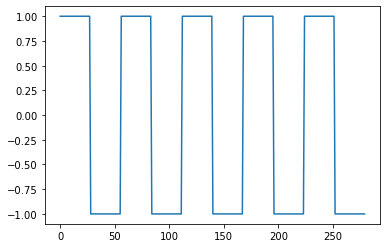

In [156]:
import numpy as np
import matplotlib.pyplot as plt
N = 57
N = int(N/2)
signal = np.hstack((np.ones(N), -1*np.ones(N)))
signal_1 = np.tile(signal, 5)
t = np.arange(0, len(signal_1))
plt.plot(t, signal_1)


In [157]:
def fourier_coefs (x_n, Ncoef):
    N = len(x_n)
    cn = np.empty(2*Ncoef, 'complex_')
    n = np.arange(0, len(x_n), 1)
    for k in np.arange(Ncoef):
        cn[k] = (1.0/N)*np.sum((x_n*np.exp(-1j*(2.0*np.pi*k*n)/N)))
        cn[-k] = (1.0/N)*np.sum((x_n*np.exp(-1j*(2.0*np.pi*-k*n)/N)))
    return cn


<p> Se graficará el espectro de la señal, usando la función fourier_coefs <p>


<ipython-input-158-46b3f7147670>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  stem = plt.stem(c_f)
C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


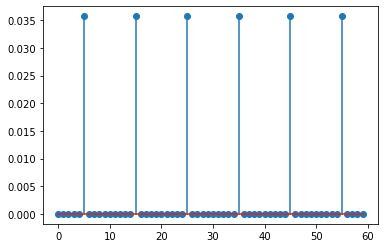

In [158]:
c_f = fourier_coefs(signal_1, 30)
stem = plt.stem(c_f)
plt.show()

In [159]:
potencia = np.power(np.absolute(c_f), 2)
potencia_1 = sum(potencia)
potencia_2 = (1/len(signal_1)*sum(np.power(signal_1, 2)))
print(potencia_1)
print(potencia_2)

0.9356254669504079
1.0


<p> No se obtuvo el resultado exactamente deseado pero se ve que hay una aproximación por parte del teorema, esta aproximación es debido a la cantidad de valores que se usan para calcular la potencia (k) y las aproximaciones que hace la máquina, pero se logró un 90% de la potencia total lo que es un buen criterio </p>

In [160]:
def synthesize_fourier(ck, N, NumP):
    n = np.arange(0, N+NumP, 1)
    senalF = np.zeros(N+NumP, 'complex')
    for k in np.arange(0, len(ck)//2):
        senalF += np.real(ck[k]*np.exp(1j*(2.0*np.pi*k*n)/N))
        senalF += np.real(ck[-k]*np.exp(1j*(2.0*np.pi*-k*n)/N))
        if k == 0:
            senalF = senalF/2
    return senalF

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


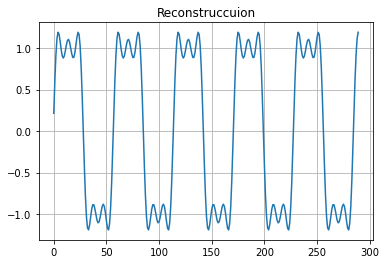

In [161]:
reconst = synthesize_fourier(c_f, 57*5, 5)
plt.plot(reconst)
plt.title("Reconstruccuion")
plt.grid()
plt.show()

<p> Se divide por 2 ya que este valor se calcula dos veces, ya que el negativo de 0 es 0, por lo que se debe dividir esta componente por 2 </p>

<h2> Transformada de Fourier </h2>

C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-162-7663c303bdef>:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(c_f)
C:\Users\josed\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


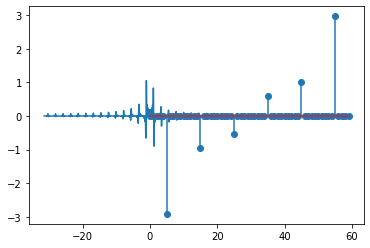

In [162]:
def fourierTransform(x_n):
    w = np.arange(-1*np.pi, np.pi, 0.001)
    senalF = np.zeros(len(w), 'complex')
    for k in np.arange(0, len(x_n)):
        senalF += x_n[k]*np.exp(-1j*w*k)
    return senalF
dtft = fourierTransform(signal_1)
dtft = dtft/np.amax(dtft)
f = ((1/100)*np.arange(int(-len(dtft)/2), int(len(dtft)/2), 1))
dtft_1 = plt.plot(f, dtft)
c_f = c_f/np.amax(c_f)
plt.stem(c_f)
plt.show()

<p> Se podría ver una similutud de manera teórica, al aumentar el número de coeficientes la transformada y la serie de fourier se deben de parecer en el tiempo discreto, pero acá no hay mucha similutud, puede ser debido a los ck, o debido a la función de transformada, pero me inclino más a pensar que es un tema de escala, ya que la transformada de furier a una pequeña escala si tiende a parecerse a la serie de fourier, por cuestiones de tiempo no pude ajustar dichas escalas </p>


<h3> Conclusiones </h3>
<p> Se pueden utilizar tanto la serie de fourier como la transformada dicreta de fourier para una señal discreta periodica dandonos resultados parecidos con una información en un espectro más amplio la transformada, pero para reconstruir es mucho más útil usar la serie de fourier.<br> Bastan unos pocos componentes espectrales en la serie de Fourier de esta señal periódica para reconstruir completamente la señal, esto se ve reflejado en el aporte de potencia, ya que tiene el 90% o más de la potencia total con un número razonable de componentes. Se puede observar en la reconstrucción el fenomeno de Gibbs, comprobando que este fenomeno también se da en los casos discretos, cosa que ya se sospechaba debido a que esto se da es por el comportamiento suave de las funciones seno y coseno que se conservan de cierto modo al pasarlo al caso discreto.<br> La escala en la transformada discreta de fourier es muy diferente a la serie de fourier, aunque la anterior se aproxime a la primera las escalas son muy diferentes, pero en forma son similares </p>